Step: 1 Import required Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Step: 2 Load and explore datasets

In [2]:
#load CIFAR-10 dataset
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()

#Normalize pixel values to [0,1]
train_images, test_images = train_images / 255.0, test_images /255.0

#check datasets shape
print("Training image shape:", train_images.shape)
print("Training label shapes:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels.shape:", test_labels.shape)

Training image shape: (50000, 32, 32, 3)
Training label shapes: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels.shape: (10000, 1)


Visualize some Images

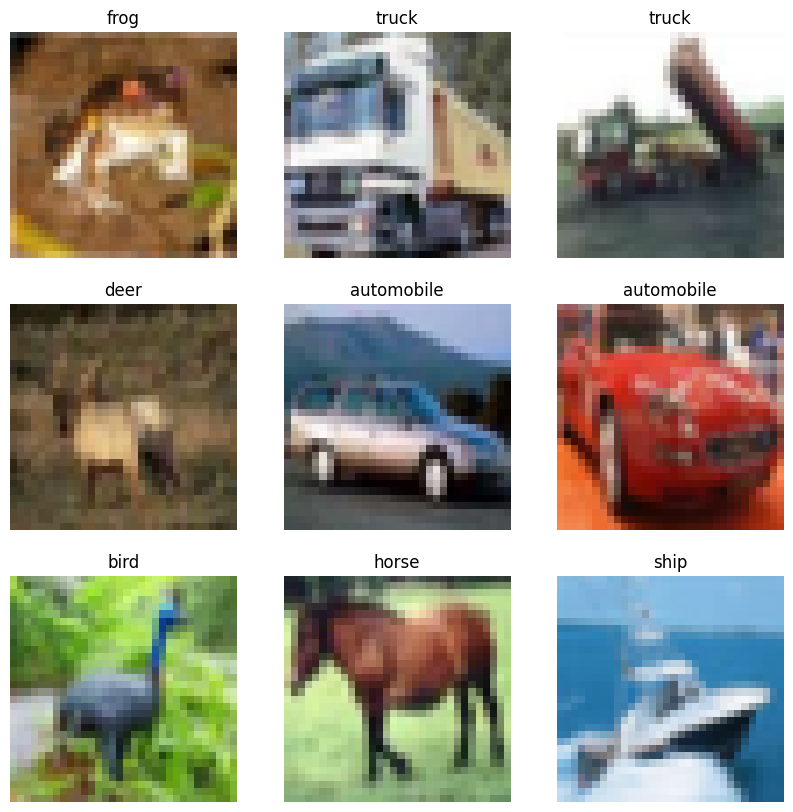

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

Step: 3 Build the CNN Model

Convolutional layer(feature extracting), 
max pooling layers(downsampling), 
fully connected (Dense) Layers(classification)

In [4]:
model= models.Sequential([
    #convlutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3), activation='relu'),

    #Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10) 
])

model.summary()

C:\Users\Diwakar Ranjan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Step :4 compiling the model

we use--  optimizer , loss function ,  metric

In [5]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Step: 5 Train the Model

In [6]:
history = model.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3633 - loss: 1.7391 - val_accuracy: 0.5269 - val_loss: 1.3016
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5742 - loss: 1.2007 - val_accuracy: 0.6227 - val_loss: 1.0656
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6467 - loss: 1.0119 - val_accuracy: 0.6438 - val_loss: 1.0118
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6792 - loss: 0.9150 - val_accuracy: 0.6818 - val_loss: 0.9191
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7058 - loss: 0.8291 - val_accuracy: 0.6782 - val_loss: 0.9269
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7304 - loss: 0.7611 - val_accuracy: 0.6988 - val_loss: 0.8769
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7529 - loss: 0.7036 - val_accuracy: 0.6949 - val_loss: 0.8858
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7751 - loss:

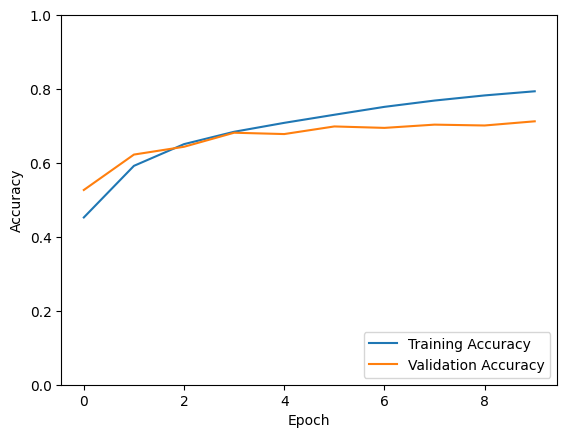

In [7]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()

Test Accuracy

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 - 1s - 4ms/step - accuracy: 0.7127 - loss: 0.8687
Test Accuracy: 71.27%


Step : 7 Make predictions

In [9]:
# convert logits to probabilities
probabilty_model = tf.keras.Sequential([model, layers.Softmax()])

# predict on test images
predictions = probabilty_model.predict(test_images)

# Display predictions for first 5 test images
for i in range(5):
    predicted_label= np.argmax(predictions[i])
    true_label= test_labels[i][0]
    print(f"Image{i+1}: Predicted:{class_names[predicted_label]}, Actual:{class_names[true_label]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Image1: Predicted:cat, Actual:cat
Image2: Predicted:ship, Actual:ship
Image3: Predicted:ship, Actual:ship
Image4: Predicted:airplane, Actual:airplane
Image5: Predicted:deer, Actual:frog
